<a href="https://colab.research.google.com/github/cszafariqbal/It_Bootcamp/blob/main/Classification_Model_weather__dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#import datasets

In [ ]:
data = pd.read_csv('weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-12,0.0,12.8,5.0,4.7,drizzle
1,02-01-12,10.9,10.6,2.8,4.5,rain
2,03-01-12,0.8,11.7,7.2,2.3,rain
3,04-01-12,20.3,12.2,5.6,4.7,rain
4,05-01-12,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,27-12-15,8.6,4.4,1.7,2.9,rain
1457,28-12-15,1.5,5.0,1.7,1.3,rain
1458,29-12-15,0.0,7.2,0.6,2.6,fog
1459,30-12-15,0.0,5.6,-1.0,3.4,sun


#data preprocessing & cleaning

In [ ]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
corr = data.corr()['wind'].sort_values(ascending = False)
corr

<ipython-input-9-55f2b7ac75b9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



wind             1.000000
precipitation    0.328045
temp_min        -0.074185
temp_max        -0.164857
Name: wind, dtype: float64

In [ ]:
X = data.drop(columns=['weather', 'date'], axis=1)
y = data['weather']

In [ ]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [ ]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

#EDA Perform

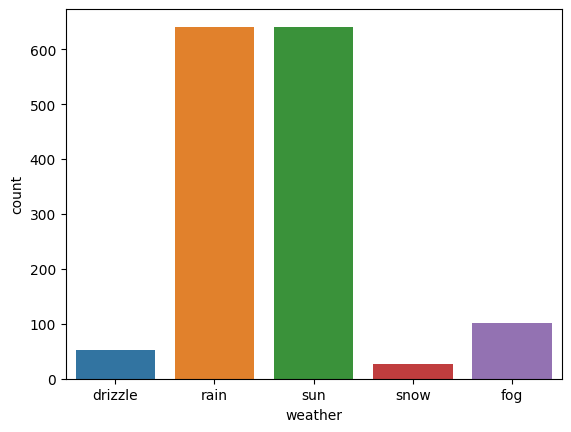

In [ ]:
sns.countplot(data, x='weather')
plt.show()

In [ ]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

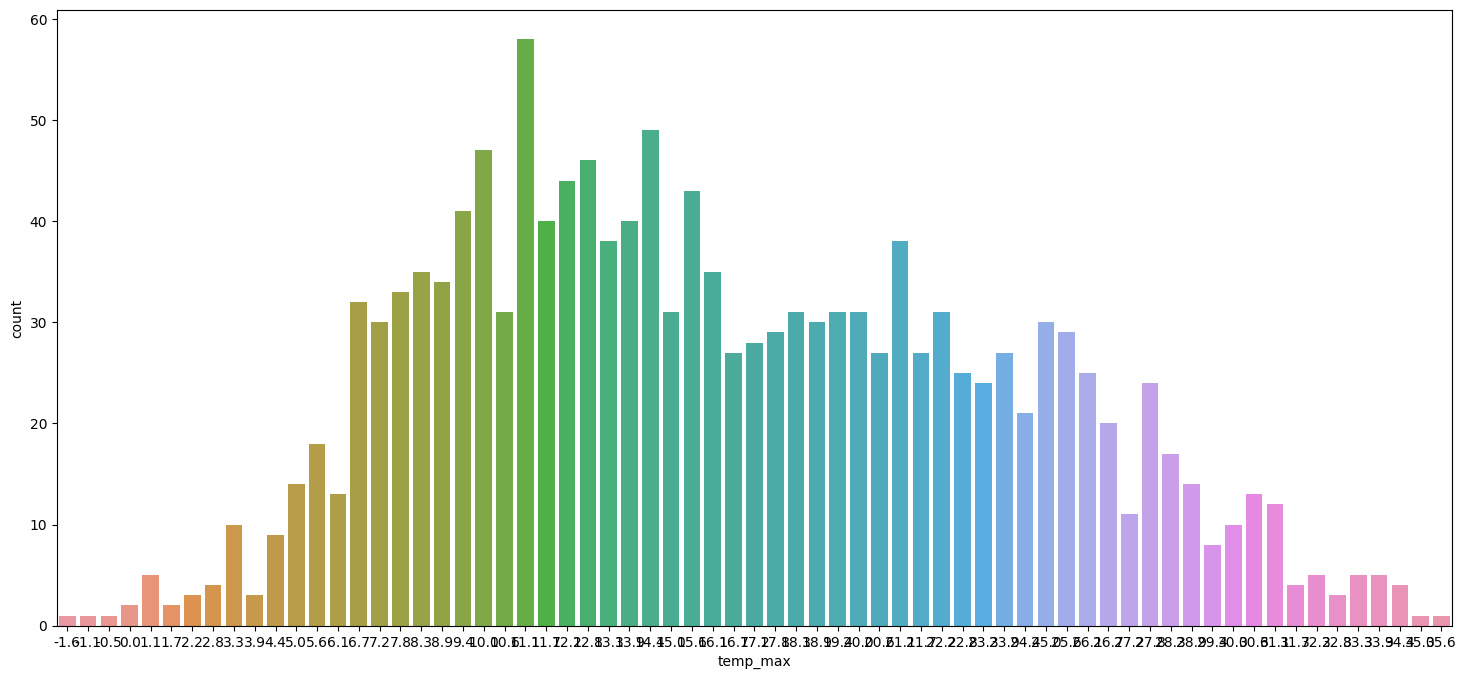

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data, x='temp_max')
plt.show()

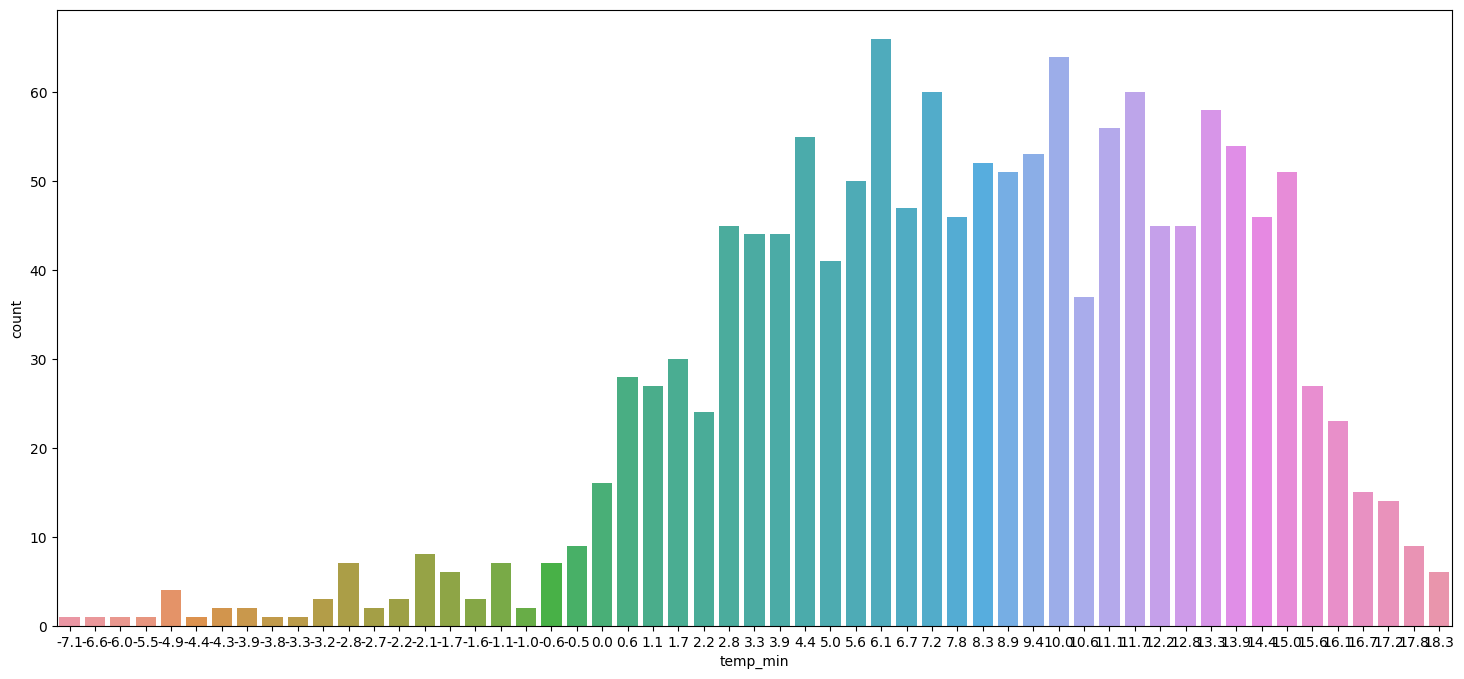

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data, x='temp_min')
plt.show()

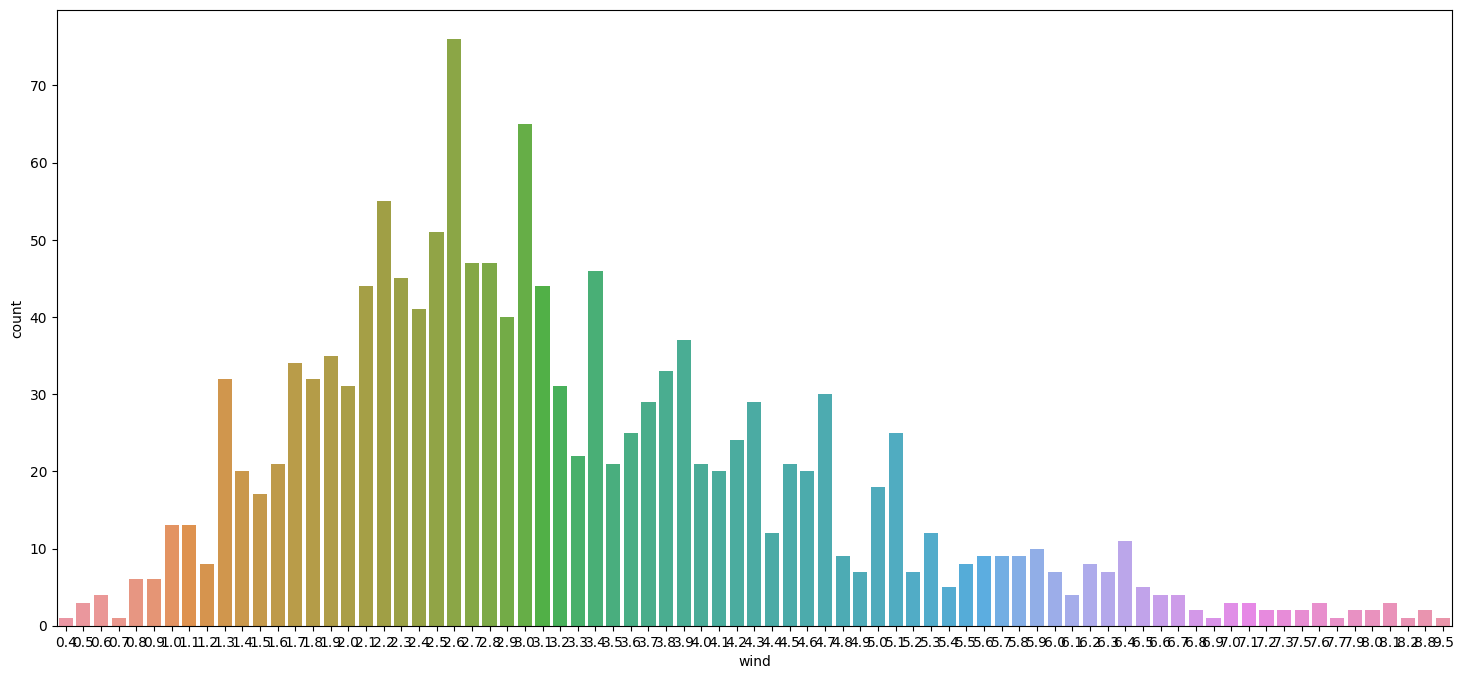

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data, x='wind')
plt.show()

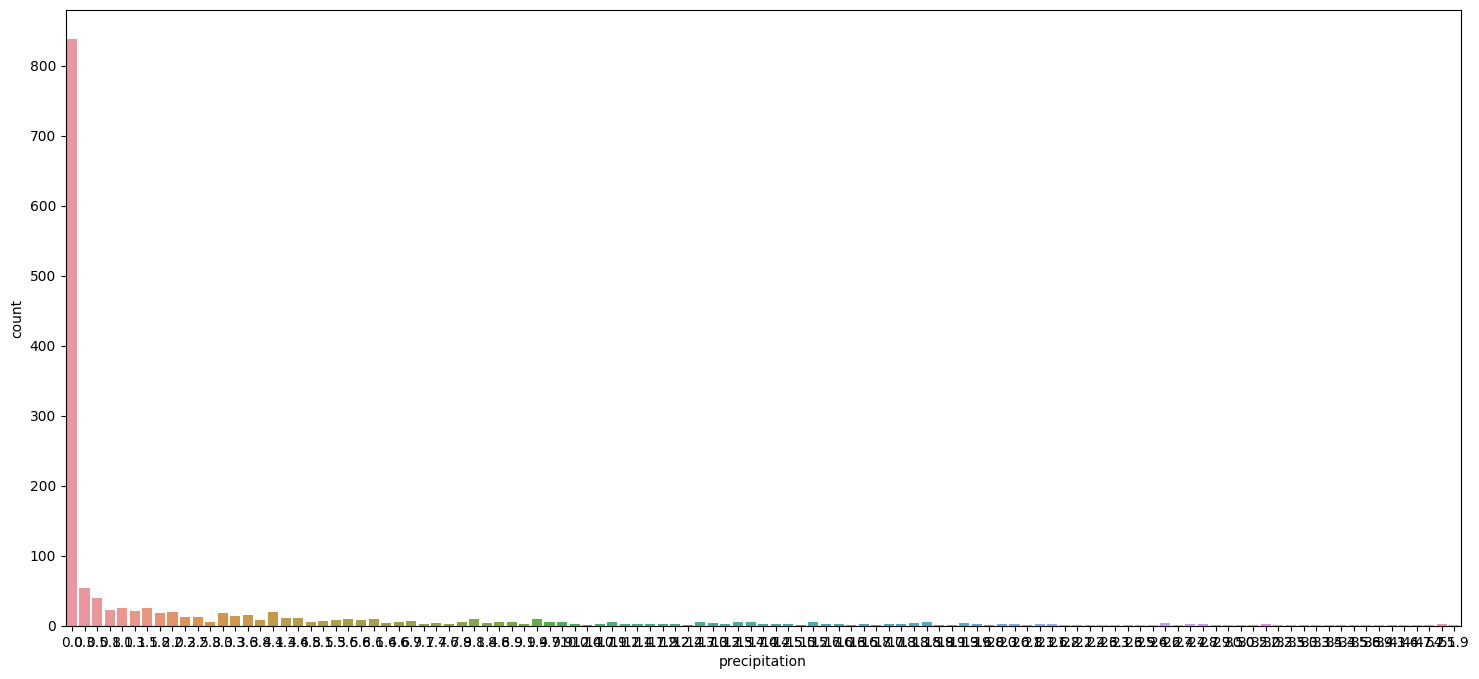

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data, x='precipitation')

plt.show()

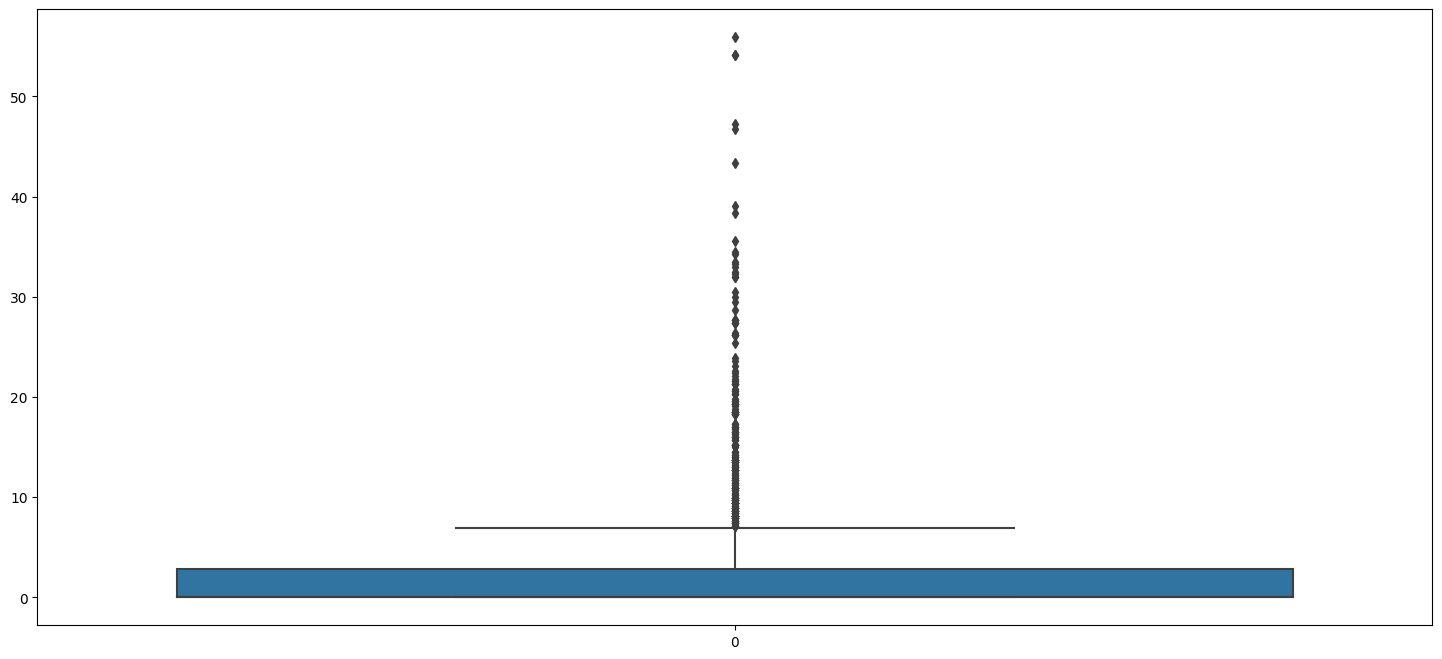

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data['precipitation'])
plt.show()

# Encoding of categorical columns


In [ ]:
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
y

array([0, 2, 2, ..., 1, 4, 4])

#split dataset in train and test dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1095, 4)
(1095,)
(366, 4)
(366,)


#Now Train the Knn model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, p=1)

In [ ]:
from tables.file import parameters
parameters = {
    "n_neighbors":[x for x in range(1,10,1)]
    }
search = GridSearchCV(knn, parameters, n_jobs=-1)
search.fit(x_train, y_train)
best_model = search.best_estimator_


In [ ]:
print(best_model)

KNeighborsClassifier(n_neighbors=8, p=1)


In [ ]:
from inspect import classify_class_attrs
pred = best_model.predict(x_test)
cm = confusion_matrix(y_test, pred)
cr = classification_report(y_test, pred)

In [ ]:
print(cm)
print(cr)

[[  2   0   1   0  10]
 [  0   4   2   0  20]
 [  1   0 136   0  17]
 [  0   0   5   1   2]
 [  1   5  10   0 149]]
              precision    recall  f1-score   support

           0       0.50      0.15      0.24        13
           1       0.44      0.15      0.23        26
           2       0.88      0.88      0.88       154
           3       1.00      0.12      0.22         8
           4       0.75      0.90      0.82       165

    accuracy                           0.80       366
   macro avg       0.72      0.44      0.48       366
weighted avg       0.78      0.80      0.77       366



#Naive Bayse Model

In [ ]:
bcl = BernoulliNB(class_prior=[0.7, 0.9, 0.7, 0.8,1.5])

In [ ]:
bcl.fit(x_train,y_train)
pred = bcl.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)


              precision    recall  f1-score   support

           0       0.24      0.31      0.27        13
           1       0.00      0.00      0.00        26
           2       0.98      0.96      0.97       154
           3       1.00      0.62      0.77         8
           4       0.79      0.92      0.85       165

    accuracy                           0.84       366
   macro avg       0.60      0.56      0.57       366
weighted avg       0.80      0.84      0.82       366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
data.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

#SVM model

In [ ]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x_train,y_train)
pred = svm.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        26
           2       0.96      0.96      0.96       154
           3       1.00      0.25      0.40         8
           4       0.79      1.00      0.88       165

    accuracy                           0.86       366
   macro avg       0.55      0.44      0.45       366
weighted avg       0.78      0.86      0.81       366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from tables.file import parameters
parameters = {
    'C':[x/10 for x in range(1,10,1)],
    'kernel':['linear', 'rbf'],
   # 'penalty':['l1','l2']
    }
search = GridSearchCV(svm, param_grid=parameters, n_jobs=-1)
search.fit(x_train, y_train)
best_model1 = search.best_estimator_


In [ ]:

best_model1.fit(x_train,y_train)
pred = svm.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        26
           2       0.96      0.96      0.96       154
           3       1.00      0.25      0.40         8
           4       0.79      1.00      0.88       165

    accuracy                           0.86       366
   macro avg       0.55      0.44      0.45       366
weighted avg       0.78      0.86      0.81       366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#DecisionTreeClassifier

In [ ]:
tree_cls = DecisionTreeClassifier(max_depth=10)

In [ ]:
parameters = {
    'max_depth': [x  for x in range(1,50,1)]
}
grid_search = GridSearchCV(tree_cls, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model2 = grid_search.best_estimator_

In [ ]:
best_model2.fit(x_train,y_train)
pred = svm.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        26
           2       0.96      0.96      0.96       154
           3       1.00      0.25      0.40         8
           4       0.79      1.00      0.88       165

    accuracy                           0.86       366
   macro avg       0.55      0.44      0.45       366
weighted avg       0.78      0.86      0.81       366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



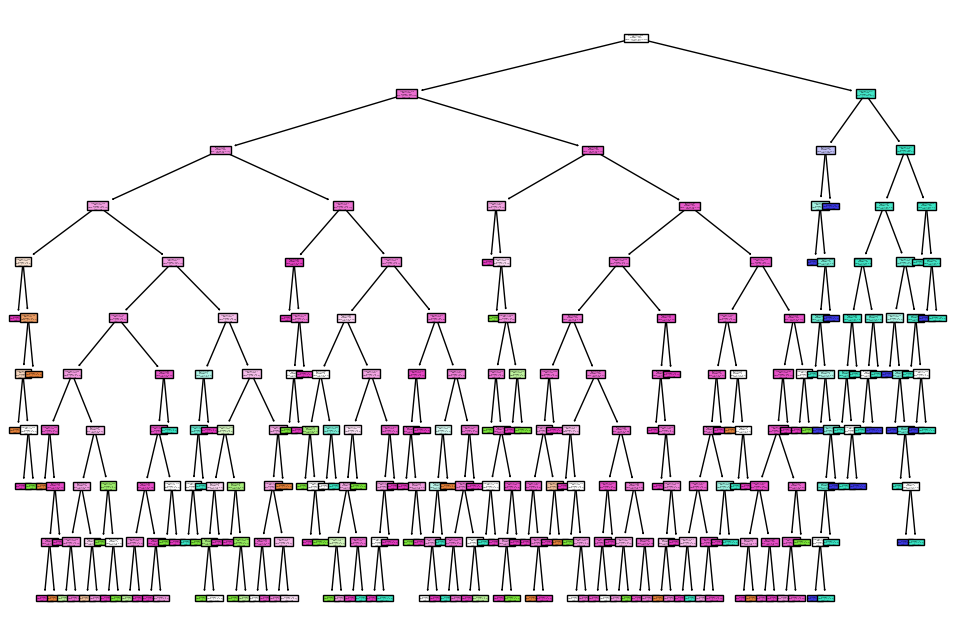

In [ ]:
from sklearn import tree
tree_cls.fit(X, y)
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_cls, feature_names=X.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()